Playing around with the creation of icosahedral-hexagonal meshes. Here, hexagons are created by combining 6 triangles, rather than using the voronoi regions. Provided by Louis Moresi to Daan Reijnders

In [1]:
import stripy as stripy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import path as mpath
import cartopy as cart
import cartopy.crs as ccrs
import pickle

In [2]:
def set_circular_boundary(ax):
    theta = np.linspace(0, 2*np.pi, 400)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    return circle

def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None))
    ax.set_extent((-180,180,60,90), crs=ccrs.PlateCarree())
    ax.coastlines(color="black")
    ax.add_feature(cart.feature.LAND, zorder=5, edgecolor='k')
    circle_clip = set_circular_boundary(ax)
    #ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr


    ax.scatter(lons0, lats0, color="Red",
                marker="o", s=50.0, transform=ccrs.Geodetic())

    ax.scatter(lonsR, latsR, color="DarkBlue",
                marker="o", s=5.0, transform=ccrs.Geodetic())

    
    segs = refined.identify_segments()

    for s1, s2 in segs:
        ax.plot( [lonsR[s1], lonsR[s2]],
                 [latsR[s1], latsR[s2]], 
                 linewidth=0.5, color="grey", transform=ccrs.Geodetic())

    fig.savefig(name, dpi=250, transparent=True)
    
    return

In [3]:
def hex_fig(mesh, meshR, hex_id, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None))
    ax.set_extent((-180,180,60,90), crs=ccrs.PlateCarree())
    ax.coastlines(color="black")
    ax.add_feature(cart.feature.LAND, zorder=5, edgecolor='k')
    circle_clip = set_circular_boundary(ax)
    #ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr

    ax.scatter(lons0, lats0, color="#888888",
                marker="o", s=2.0, transform=ccrs.Geodetic(), zorder=2)
   
    ax.tripcolor(  lonsR, latsR, triangles=refined.simplices, facecolors=hex_id, transform=ccrs.Geodetic(), zorder=1, cmap='Set3' )

    fig.savefig(name, dpi=250)
    
    return

In [4]:
# Create finer meshes
ico0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0)
ico1 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=1)
ico2 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2)
ico3 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=3)
ico4 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4)
ico5 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=5)
ico6 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=6)

In [9]:
# Constructing some facepoints and grouping triangles for plotting.
facepoints_lons, facepoints_lats = ico6.face_midpoints()
icof6 = stripy.sTriangulation(np.hstack((ico6.lons, facepoints_lons)), np.hstack((ico6.lats, facepoints_lats)))
identifier6 = np.ones(icof6.npoints)
identifier6[ico6.npoints:] = 0 # make index of last face 0
hex_id6 = icof6.simplices[np.where(identifier6[icof6.simplices] == 1.0)]

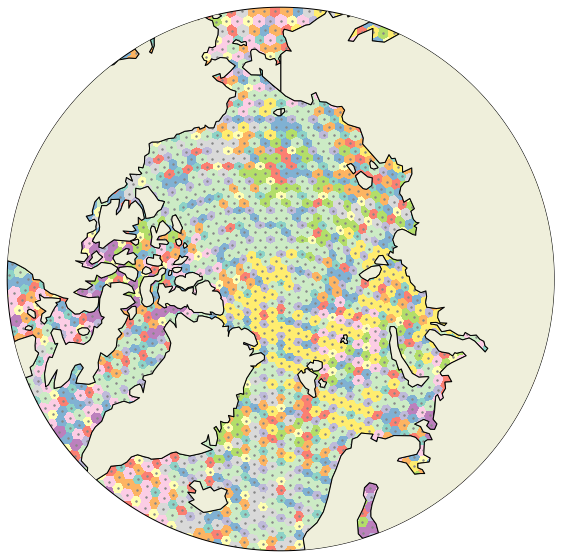

In [12]:
hex_fig(ico6, icof6, hex_id6, 'hex6')

In [70]:
# Creating dictionaries with numpy arrays containing mesh information
def save_ico_mesh(refinement, F=True):
    icoMesh = {}
    ico = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=refinement)
    if F:
        facepoints_lons, facepoints_lats = ico.face_midpoints()
        icof = stripy.sTriangulation(np.hstack((ico.lons, facepoints_lons)), np.hstack((ico.lats, facepoints_lats)))
        identifier = np.ones(icof.npoints)
        identifier[ico.npoints:] = 0 # make index of last face 0
        hex_id = icof.simplices[np.where(identifier[icof.simplices] == 1.0)]
    
    icoMesh['permutation'] = ico._permutation
    icoMesh['lats'] = ico.lats
    icoMesh['lons'] = ico.lons
    icoMesh['areas'] = ico.areas()
    icoMesh['edge_lengths'] = ico.edge_lengths()
    icoMesh['points'] = ico.points
    icoMesh['simplices'] = ico.simplices
    if F:
        icoMesh['hex_id'] = hex_id
        icoMesh['fpermutation'] = icof._permutation
        icoMesh['flats'] = icof.lats
        icoMesh['flons'] = icof.lons
        icoMesh['fareas'] = icof.areas()
        icoMesh['fedge_lengths'] = icof.edge_lengths()
        icoMesh['fpoints'] = icof.points
        icoMesh['fsimplices'] = icof.simplices
    if F:
        with open('ico_mesh_hex_r{}'.format(refinement), 'wb') as dumpFile:
            pickle.dump(icoMesh, dumpFile)
    else:
        with open('ico_mesh_hex_r{}_noF'.format(refinement), 'wb') as dumpFile:
            pickle.dump(icoMesh, dumpFile)

In [ ]:
save_ico_mesh(11, F=False)